In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
from pandas import read_csv, DataFrame
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

dataset = read_csv('E:/guitar+chords+finger+positions/TCGA_GBM_LGG_Mutations_all.csv', sep=',',quotechar='"')


In [ ]:
dataset.shape

In [2]:
dataset.head(10)

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,LGG,TCGA-LGG,TCGA-DB-A4X9,Female,33 years 78 days,Mixed glioma,white,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,LGG,TCGA-LGG,TCGA-P5-A5F4,Female,35 years 68 days,"Oligodendroglioma, anaplastic",white,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,LGG,TCGA-LGG,TCGA-FG-A4MY,Female,44 years 239 days,Mixed glioma,white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,LGG,TCGA-LGG,TCGA-HT-A5R5,Female,33 years 350 days,"Oligodendroglioma, NOS",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,LGG,TCGA-LGG,TCGA-DU-A76K,Male,87 years,"Oligodendroglioma, NOS",white,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
dataset.info()

In [ ]:
dataset.head()

In [ ]:
dataset['Age_at_diagnosis'].unique()

In [ ]:
dataset['CHORD_ROOT'].value_counts()

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

enc_ = OrdinalEncoder()

dataset[['Grade']] = enc_.fit_transform(dataset[['Grade']])
dataset[['Project']] = enc_.fit_transform(dataset[['Project']])
dataset[['Case_ID']] = enc_.fit_transform(dataset[['Case_ID']])
dataset[['Gender']] = enc_.fit_transform(dataset[['Gender']])
dataset[['Primary_Diagnosis']] = enc_.fit_transform(dataset[['Primary_Diagnosis']])
dataset[['Age_at_diagnosis']] = enc_.fit_transform(dataset[['Age_at_diagnosis']])
dataset[['Race']] = enc_.fit_transform(dataset[['Race']])



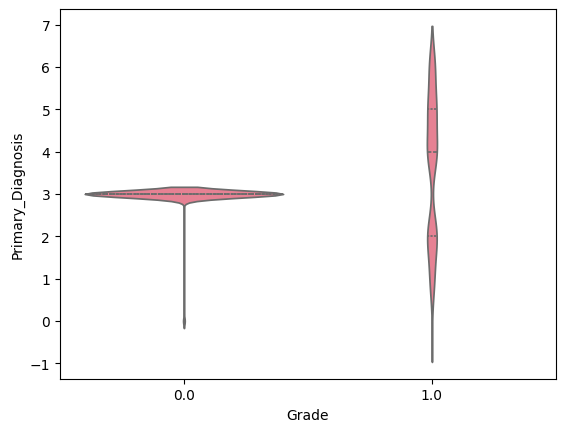

In [4]:
sns.violinplot(y='Primary_Diagnosis', x='Grade', data=dataset, inner='quartile')
plt.show()


In [ ]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(dataset, hue='Grade', markers='+')
plt.show()

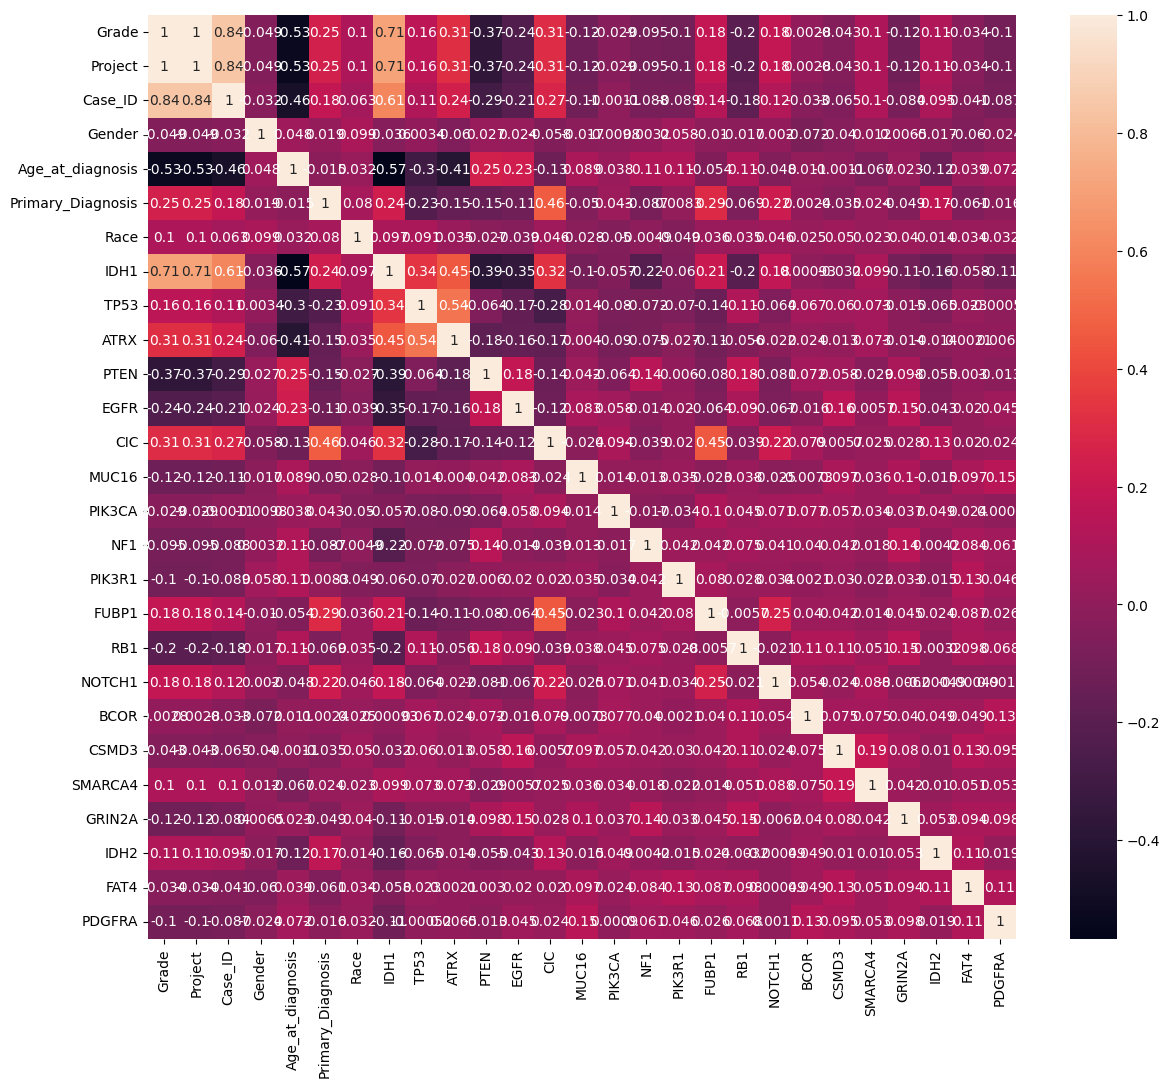

In [7]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(14,12))

sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

In [8]:
X = dataset.drop(['Grade'], axis=1)
y = dataset['Grade'].astype(np.int_)
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (862, 26) | y shape: (862,) 


In [ ]:
X.head()

In [9]:
import scipy.stats as stats


# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, shuffle=False)

# stats.ttest_ind (a=y_train, b=y_test)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=35, stratify=y)

stats.ttest_ind (a=y_train, b=y_test)

Ttest_indResult(statistic=0.049140742491719444, pvalue=0.9608185447314342)

In [11]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.995890 (0.006278)
LDA: 0.959015 (0.022923)
KNN: 0.982210 (0.013773)
CART: 1.000000 (0.000000)
NB: 0.997260 (0.005479)
SVC: 0.609219 (0.025589)


In [13]:
sk_lda = LinearDiscriminantAnalysis()#DecisionTreeClassifier(random_state=1)
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
#sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')


sk LDA accuracy: 0.9538461538461539
sk LDA prediction: [1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1
 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1]


In [ ]:
X_train.head()


<AxesSubplot:title={'center':'LDA surface with original features'}>

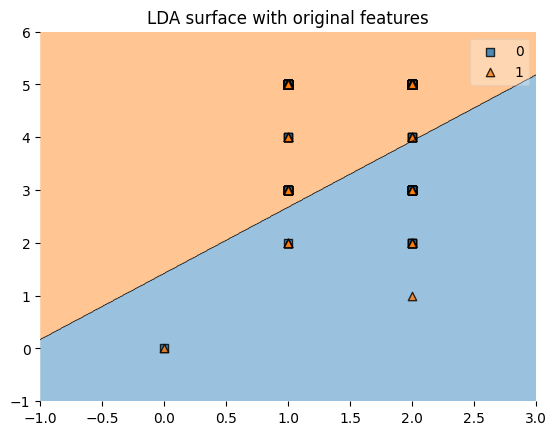

In [14]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['Gender','Race']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis()
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)